# Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import davies_bouldin_score

In [3]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
transaction_summary = transactions.groupby("CustomerID").agg(
    TotalSpent=("TotalValue", "sum"), 
    PurchaseFrequency=("TransactionID", "count"),
    AvgOrderValue=("TotalValue", "mean")
).reset_index()


In [5]:
transaction_summary

,CustomerID,TotalSpent,PurchaseFrequency,AvgOrderValue
0,C0001,3354.52,5,670.904000
1,C0002,1862.74,4,465.685000
2,C0003,2725.38,4,681.345000
3,C0004,5354.88,8,669.360000
4,C0005,2034.24,3,678.080000
...,...,...,...,...
194,C0196,4982.88,4,1245.720000
195,C0197,1928.65,3,642.883333
196,C0198,931.83,2,465.915000
197,C0199,1979.28,4,494.820000


In [6]:
data = customers.merge(transaction_summary, on="CustomerID", how="left")
data.fillna(0, inplace=True)
data


,CustomerID,CustomerName,Region,SignupDate,TotalSpent,PurchaseFrequency,AvgOrderValue
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,5.0,670.904000
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,4.0,465.685000
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,4.0,681.345000
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,8.0,669.360000
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,3.0,678.080000
...,...,...,...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07,4982.88,4.0,1245.720000
196,C0197,Christina Harvey,Europe,2023-03-21,1928.65,3.0,642.883333
197,C0198,Rebecca Ray,Europe,2022-02-27,931.83,2.0,465.915000
198,C0199,Andrea Jenkins,Europe,2022-12-03,1979.28,4.0,494.820000


In [7]:
encoder = OneHotEncoder(drop="first", sparse=False)
region_encoded = encoder.fit_transform(data[["Region"]])
region_encoded_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out(["Region"]))
region_encoded_df


c:\Users\College-PC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Region_Europe,Region_North America,Region_South America
0,0.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,0.0
...,...,...,...
195,1.0,0.0,0.0
196,1.0,0.0,0.0
197,1.0,0.0,0.0
198,1.0,0.0,0.0


In [8]:
data["SignupDate"] = pd.to_datetime(data["SignupDate"])
data["CustomerTenure"] = (pd.to_datetime("2024-12-31") - data["SignupDate"]).dt.days // 30


In [9]:
features = pd.concat([data[["TotalSpent", "PurchaseFrequency", "AvgOrderValue", "CustomerTenure"]], region_encoded_df], axis=1)
features


,TotalSpent,PurchaseFrequency,AvgOrderValue,CustomerTenure,Region_Europe,Region_North America,Region_South America
0,3354.52,5.0,670.904000,30,0.0,0.0,1.0
1,1862.74,4.0,465.685000,35,0.0,0.0,0.0
2,2725.38,4.0,681.345000,9,0.0,0.0,1.0
3,5354.88,8.0,669.360000,27,0.0,0.0,1.0
4,2034.24,3.0,678.080000,28,0.0,0.0,0.0
...,...,...,...,...,...,...,...
195,4982.88,4.0,1245.720000,31,1.0,0.0,0.0
196,1928.65,3.0,642.883333,21,1.0,0.0,0.0
197,931.83,2.0,465.915000,34,1.0,0.0,0.0
198,1979.28,4.0,494.820000,25,1.0,0.0,0.0


In [10]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [11]:
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

c:\Users\College-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\College-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\College-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\College-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with

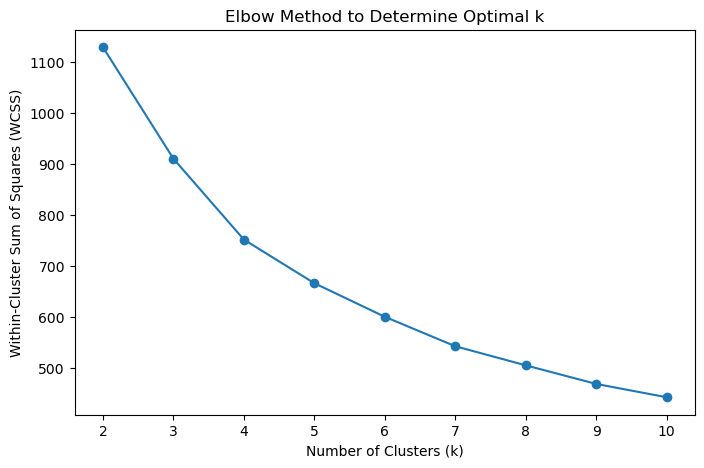

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method to Determine Optimal k")
plt.show()


In [40]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
data["Cluster"] = kmeans.fit_predict(scaled_features)
data

c:\Users\College-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\College-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,CustomerID,CustomerName,Region,SignupDate,TotalSpent,PurchaseFrequency,AvgOrderValue,CustomerTenure,Cluster
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,5.0,670.904000,30,3
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,4.0,465.685000,35,0
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,4.0,681.345000,9,0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,8.0,669.360000,27,3
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,3.0,678.080000,28,0
...,...,...,...,...,...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07,4982.88,4.0,1245.720000,31,2
196,C0197,Christina Harvey,Europe,2023-03-21,1928.65,3.0,642.883333,21,2
197,C0198,Rebecca Ray,Europe,2022-02-27,931.83,2.0,465.915000,34,2
198,C0199,Andrea Jenkins,Europe,2022-12-03,1979.28,4.0,494.820000,25,2


In [41]:
db_index = davies_bouldin_score(scaled_features, data["Cluster"])
print(f"Davies-Bouldin Index: {round(db_index,4)}")

Davies-Bouldin Index: 1.3925


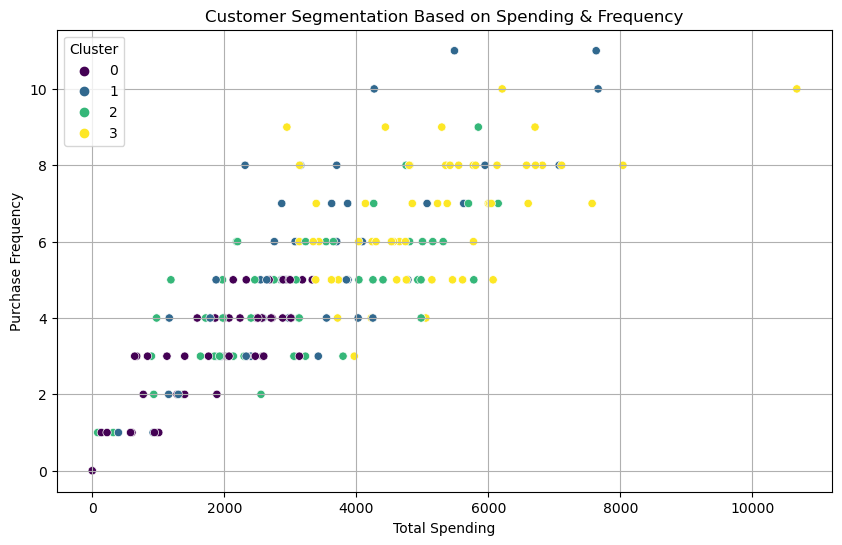

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["TotalSpent"], y=data["PurchaseFrequency"], hue=data["Cluster"], palette="viridis")
plt.xlabel("Total Spending")
plt.ylabel("Purchase Frequency")
plt.title("Customer Segmentation Based on Spending & Frequency")
plt.legend(title="Cluster")
plt.grid()
plt.show()